# Task01 文件处理与邮件自动化

- 文件路径识别、处理、文件夹的操作理论学习

- 文件自动化处理实践

- 邮件自动发送理论学习，使用python发送邮件附带excel附件

我们知道，程序运行时，可以用变量来保存运算结果，但如果希望程序运行关闭后，依然可以查看运行后的结果，就需要将数据保存到文件中。简单点，你可以将文件内容理解为一个字符串值，大小可能有几个GB。本节将学习，如何使用python在硬盘上创建、读取和保存文件

## 1.1 文件处理

### 1.1.1 文件与文件路径

文件的两个属性：“路径”和“文件名”，路径指明文件在计算机上的位置，文件名是指该位置的文件的名称。比如，我的电脑上，有个名字为Datawhale - 开源发展理论研究.pdf的文件，它的路径在D:\Datawhale。在windows中，路径中的D:\部分是“根文件夹”，Datawhale是文件夹名。注：Windows中文件夹名和文件名不区分大小写的。

在windows上，路径书写是使用倒斜杠'\'作为文件夹之间的分隔符，而在OS X和Linux上，是使用正斜杠'/'作为它们的路径分隔符。通常我们用os.path.join()函数来创建文件名称字符串。

os常用的操作函数如下图

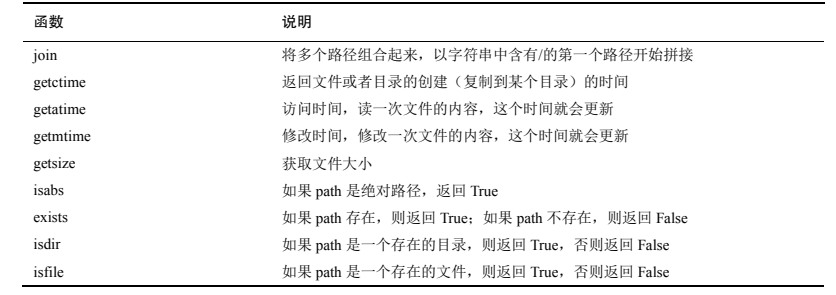

In [8]:
import os
os.path.join('Datawhale','docu')

'Datawhale\\docu'

我们可以看到返回的是（'Datawhale\\\docu'），有两个斜杠，这是因为有一个斜杠是用来转义的，在OS X或Linux上调用这个函数，这个字符串就会是'Datawhale/docu'。

### 1.1.2 当前工作目录

每个运行在计算机上的程序，都有一个“当前工作目录”。利用os.getcwd()函数，可以取得当前工作路径的

字符串，并可以利用os.chdir()改变它。

In [9]:
import os
os.getcwd()          #获取当前工作目录，即执行该代码的文件的所在路径

'F:\\JupyterNotebook\\Now\\DataWhale'

In [10]:
os.chdir('D:\\Datawhale\\python办公自动化')          #改变当前工作目录
os.getcwd() 

FileNotFoundError: [WinError 3] 系统找不到指定的路径。: 'D:\\Datawhale\\python办公自动化'

如果没有创建好文件目录，就进行路径改变是不能直接转移的，os.chdir是不能直接新建文件夹创造路径的

In [11]:
os.chdir('F:\\JupyterNotebook\\')          #改变当前工作目录
os.getcwd() 

'F:\\JupyterNotebook'

### 1.1.3  路径操作

#### 1.1.3.1 绝对路径和相对路径

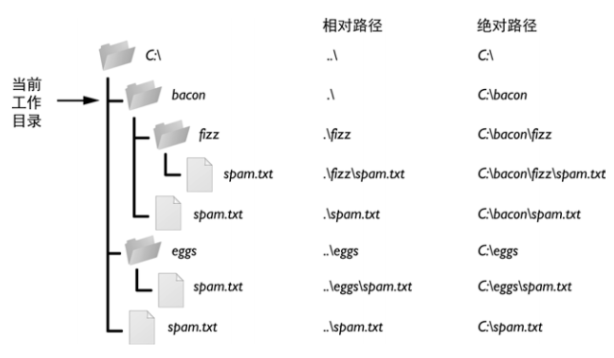


“绝对路径”，总是从根文件夹开始。

“相对路径”，相对于程序的当前工作目录。

相对路径中，单个句点“.”表示当前目录的缩写，两个句点“..”表示父文件夹。


几个常用的绝对路径和相对路径处理函数

- os.path.abspath(path)：将相对路径转换为绝对路径，将返回参数的绝对路径的字符串。

- os.path.isabs(path)：判断是否是绝对路径，是返回True,不是则返回False

In [12]:
"""
注意：这里我们是要先手动回到我们代码文件的真正工作目录下
因为我们上一句代码 改变了 当前工作目录
"""
os.chdir('F:\\JupyterNotebook\\Now\\DataWhale')   

# 我们当前代码文件所在路径为
# F:\\JupyterNotebook\\Now\\DataWhale
print('当前代码文件路径为：',os.getcwd())
print('转换相对父文件夹为绝对路径：',os.path.abspath('../')) 
print('判断用..代表父路径下是否为绝对路径：',os.path.isabs('../'))
print('判断用绝对父路径下是否为绝对路径：',os.path.isabs(os.path.abspath('../')))

当前代码文件路径为： F:\JupyterNotebook\Now\DataWhale
转换相对父文件夹为绝对路径： F:\JupyterNotebook\Now
判断用..代表父路径下是否为绝对路径： False
判断用绝对父路径下是否为绝对路径： True


#### 1.1.3.2 路径操作

- os.path.relpath(path,start):返回从start路径到path的相对路径的字符串。如果没提供start,就使用当前工作目录作为开始路径。

- os.path.dirname(path): 返回当前路径的目录名称。

- os.path.basename(path)：返回当前路径的文件名称。


In [13]:
os.path.relpath('D:\\Datawhale\\python办公自动化','D:\\')       

'Datawhale\\python办公自动化'

In [14]:
path = 'D:\\Datawhale\\python办公自动化\\python课程画图.pptx'  
os.path.dirname(path)     #'D:\\Datawhale\\python办公自动化'

'D:\\Datawhale\\python办公自动化'

In [16]:
os.path.basename(path)   #'python课程画图.pptx'

'python课程画图.pptx'

如果同时需要一个路径的目录名称和基本名称，可以调用os.path.split()，获得者两个字符串的元组。

In [17]:
caFilePath = 'D:\\Datawhale\\python办公自动化\\python课程画图.pptx'
os.path.split(caFilePath)   #('D:\\Datawhale\\python办公自动化', 'python课程画图.pptx')

('D:\\Datawhale\\python办公自动化', 'python课程画图.pptx')

我们也可以调用os.path.dirname()和os.path.basename(),将它们的返回值放在一个元组中，从而得到同样的元组。

In [18]:
(os.path.dirname(caFilePath),os.path.basename(caFilePath))  #('D:\\Datawhale\\python办公自动化', 'python课程画图.pptx')

('D:\\Datawhale\\python办公自动化', 'python课程画图.pptx')

如果我们想返回每个文件夹的字符串的列表。用os.path.split()无法得到，我们可以用split()字符串方法，并根据os.path.sep 中的字符串进行分割。os.path.sep 变量设置为正确的文件夹分割斜杠。

In [19]:
caFilePath.split(os.path.sep)   #['D:', 'Datawhale', 'python办公自动化', 'python课程画图.pptx']

['D:', 'Datawhale', 'python办公自动化', 'python课程画图.pptx']

#### 1.1.3.3 路径有效性检查

如果提供的路径不存在，很多Python函数就会崩溃并报错。os.path模块提供了一些函数，用于检测给定的路径是否存在，以及判定是文件还是文件夹。

- os.path.exists(path)：如果path参数所指的文件或文件夹存在，则返回True,否则返回False。

- os.path.isfile(path)：如果path参数存在，并且是一个文件，则返回True,否则返回False。

- os.path.isdir(path)：如果path参数存在，并且是一个文件夹，则返回True,否则返回False。


In [20]:
os.path.exists('C:\\Windows')

True

In [22]:
os.path.exists('C:\\else')

False

In [23]:
os.path.isfile('D:\\Datawhale\\python办公自动化\\python课程画图.pptx')

False

In [24]:
os.path.isdir('D:\\Datawhale\\python办公自动化\\python课程画图.pptx')

False

### 1.1.4  文件及文件夹操作

#### 1.1.4.1 用os.makedirs()创建新文件夹

注：os.makedirs()可以创建所有必要的中间文件夹。

In [25]:
import os
os.makedirs('D:\\Datawhale\\practice')  #查看目录，已创建，若文件夹已存在，不会覆盖，会报错

#### 1.1.4.2 查看文件大小和文件夹内容

我们已经可以处理文件路径，这是操作文件及文件夹的基础。接下来，我们可以搜集特定文件和文件夹的信息。os.path模块提供了一些函数，用于查看文件的字节数以及给定文件夹中的文件和子文件夹。

- os.path.getsize(path)：返回path参数中文件的字节数。

- os.listdir(path):返回文件名字符串的列表，包含path参数中的每个文件。


In [33]:
"""
注意这里你可以自己按照这个路径新建文件夹，并任意放入一个pptx文件，
并重命名为python课程画图.pptx。否则若不存在该文件将会报错，而非0字节
"""
os.path.getsize('D:\\Datawhale\\python办公自动化\\python课程画图.pptx')

1959125

In [34]:
os.listdir('D:\\Datawhale\\python办公自动化')

['python课程画图.pptx', 'test.txt']

如果想知道目录下所有文件的总字节数，可以同时使用 *os.path.getsize()* 和 *os.listdir()*

In [35]:
totalSize = 0
for filename in os.listdir('D:\\Datawhale\\python办公自动化'):
    totalSize = totalSize + os.path.getsize(os.path.join('D:\\Datawhale\\python办公自动化',filename))
print(totalSize)

1959603


### 1.1.5 文件读写过程

要实现文件读写，首先要获取文件对象，获取文件对象后，就可以使用文件对象的读写方法来读写文件

读写文件3个步骤：

1.调用*open()*函数，返回一个File对象。

2.调用File对象的 *read()* 或 *write()* 方法。

3.调用File对象的 *close()* 方法，关闭该文件。


open函数中 常见的对象方法及其作用说明：


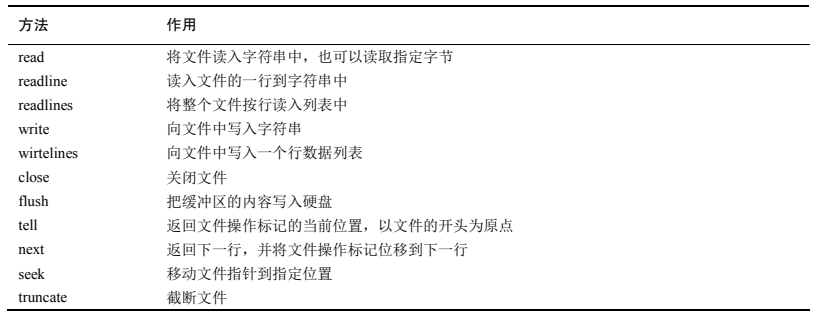

#### 1.1.5.1 用open()函数打开文件

要用*open()*函数打开一个文件，就要向它传递一个字符串路径，表明希望打开的文件。这既可以是绝对路径，也可以是相对路径。*open()*函数返回一个File对象。

先用TextEdit创建一个文本文件，名为hello.txt。输入hello world!等字符作为该文本文件的内容，将它保存在你的用户文件夹中。

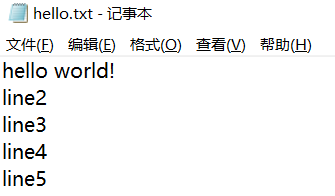

文件对象可以通过Python内置的open函数得到，完整的语法如下。

open(file,mode=r',buffering=-1,encoding=None,errors=None,newline=None,closefd=True,opener=None)

open函数有8个参数，常用前4个，除了file参数外，其他参数都有默认值。file指定了要打开的文件名称，应包含文件路径，不写路径则表示文件和当前py脚本在同一个文件夹。buffering用于指定打开文件所用的缓冲方式，默认值-1表示使用系统默认的缓冲机制。文件读写要与硬盘交互，设置缓冲区的目的是减少CPU操作磁盘的次数，延长硬盘使用寿命。encoding用于指定文件的编码方式，如GBK、UTF-8等，默认采用UTF-8，有时候打开一个文件全是乱码，这是因为编码参数和创建文件时采用的编码方式不一样。

mode指定了文件的打开模式。打开文件的基本模式包括r、w、a，对应读、写、追加写入。附加模式包括b、t、+，表示二进制模式、文本模式、读写模式，附加模式需要和基本模式组合才能使用，如“rb”表示以二进制只读模式打开文件，“rb+”表示以二进制读写模式打开文件。

要注意的是，凡是带w的模式，操作时都要非常谨慎，它首先会清空原文件，但不会有提示。凡是带r的文件必须先存在，否则会因找不到文件而报错。

In [42]:
helloFile = open('D:\\Datawhale\\python办公自动化\\hello.txt')
print(helloFile)

<_io.TextIOWrapper name='D:\\Datawhale\\python办公自动化\\hello.txt' mode='r' encoding='cp936'>


可以看到，调用open()函数将会返回一个File对象。当你需要读取或写入该文件，就可以调用helloFile变量中的File对象的方法。

#### 1.1.5.2 读取文件内容

有了File对象，我们就可以开始从它读取内容。

- read():读取文件内容。

- readlines():按行读取文件中的内容，取得一个字符串列表，列表中每个字符串是文本中的一行且以\n结束。


In [43]:
helloContent = helloFile.read()
helloContent

'hello world! \nline2\nline3\nline4\nline5'

In [44]:
sonnetFile = open('D:\\Datawhale\\python办公自动化\\hello.txt')
sonnetFile.readlines()

['hello world! \n', 'line2\n', 'line3\n', 'line4\n', 'line5']

#### 1.1.5.3 写入文件

需要用“写模式”‘w’和“添加模式”'a'打开一个文件，而不能用读模式打开文件。

“写模式”将覆写原有的文件，从头开始。“添加模式”将在已有文件的末尾添加文本。

In [45]:
baconFile = open('bacon.txt','w')
baconFile.write('Hello world!\n')

13

In [46]:
baconFile.close()  #注意，关闭后，才能完成写入，从txt文件中看到写入的内容。

In [47]:
baconFile = open('bacon.txt','a')
baconFile.write('Bacon is not a vegetable.')

25

In [48]:
baconFile.close() 

In [49]:
baconFile = open('bacon.txt')
content = baconFile.read()
baconFile.close()
print(content)

Hello world!
Bacon is not a vegetable.


注意，*write()*方法不会像*print()*函数那样，在字符串的末尾自动添加换行字符。必须自己添加该字符。

- 案例：统计字母出现的频率

文件对象有iter、next方法，所以它是一个可迭代对象，可以用for循环遍历。我们可以遍历文件获得每一行字符，再遍历每一行，获得每个字符，将字符放入列表，然后统计每个字符出现的频率。

In [3]:
from collections import Counter
my_list = []
punctuation=',.!?\，。！？、()【】<>《》=：+-*“”...\n'
with open('bacon.txt','r') as f:
    for line in f:
        for word in line:
            if word not in punctuation:
                my_list.append(word)

counter = Counter(my_list)
counter

Counter({'H': 1,
         'e': 4,
         'l': 4,
         'o': 4,
         ' ': 5,
         'w': 1,
         'r': 1,
         'd': 1,
         'B': 1,
         'a': 3,
         'c': 1,
         'n': 2,
         'i': 1,
         's': 1,
         't': 2,
         'v': 1,
         'g': 1,
         'b': 1})

#### 1.1.5.4 保存变量

- 1)、shelve模块

用*shelve*模块，可以将Python中的变量保存到二进制的*shelf*文件中。这样，程序就可以从硬盘中恢复变量的数据。

In [50]:
import shelve
shelfFile = shelve.open('mydata')
cats = ['Zonphie','Pooka','Simon']
shelfFile['cats'] = cats
shelfFile.close()

在Windows上运行前面的代码，我们会看到当前工作目录下有3个新文件：mydata.bak、mydata.dat和mydata.dir。在OS X上，只会创建一个mydata.db文件。

重新打开这些文件，取出数据。注意：shelf值不必用读模式或写模式打开，因为打开后，既能读又能写。


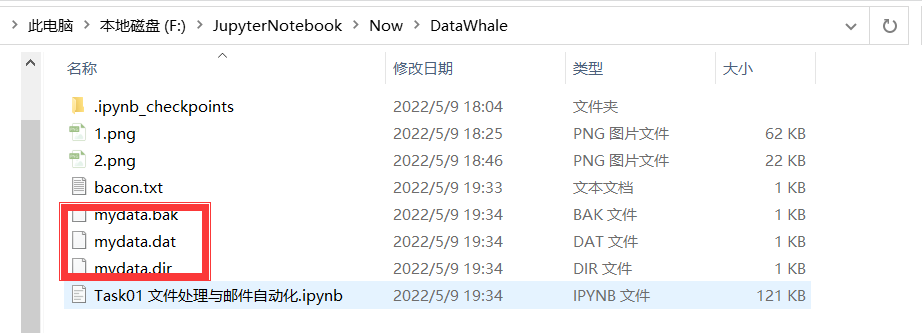

In [51]:
shelfFile = shelve.open('mydata')
type(shelfFile)

shelve.DbfilenameShelf

In [52]:
shelve.DbfilenameShelf

shelve.DbfilenameShelf

In [53]:
shelfFile['cats']

['Zonphie', 'Pooka', 'Simon']

In [54]:
shelfFile.close()

就像字典一样，shelf值有*keys()*和*values()*方法，返回shelf中键和值的类似列表的值。但是这些方法返回类似列表的值，却不是真正的列表，所以应该将它们传递给*list()*函数，取得列表的形式。

In [55]:
shelfFile = shelve.open('mydata')
list(shelfFile.keys())

['cats']

In [56]:
list(shelfFile.values())

[['Zonphie', 'Pooka', 'Simon']]

In [57]:
shelfFile.close()

- 2)、用pprint.pformat()函数保存变量

*pprint.pformat()*函数返回要打印的内容的文本字符串，这个字符串既易于阅读，也是语法上正确的Python代码。

假如，有一个字典，保存在一个变量中，希望保存这个变量和它的内容，以便将来使用。*pprint.pformat()*函数将提供一个字符串，我们可以将它写入.py文件。这个文件可以成为我们自己的模块，如果需要使用存储其中的变量，就可以导入它。

In [58]:
import  pprint
cats = [{'name':'Zophie','desc':'chubby'},{'name':'Pooka','desc':'fluffy'}]
pprint.pformat(cats)

"[{'desc': 'chubby', 'name': 'Zophie'}, {'desc': 'fluffy', 'name': 'Pooka'}]"

In [59]:
fileObj = open('myCats.py','w')
fileObj.write('cats = '+pprint.pformat(cats)+'\n')

83

In [60]:
fileObj.close()

import语句导入的模块本身就是Python脚本。如果来自pprint.pformat()的字符串保存为一个.py文件，该文件就是一个可以导入的模块。

In [61]:
import myCats
myCats.cats

[{'desc': 'chubby', 'name': 'Zophie'}, {'desc': 'fluffy', 'name': 'Pooka'}]

In [62]:
myCats.cats[0]

{'desc': 'chubby', 'name': 'Zophie'}

In [63]:
myCats.cats[0]['name']

'Zophie'

### 1.1.6 练习

- 1、如果已有的文件以写模式打开，会发生什么？

提示：


以写模式打开

r : 只读模式，文件不存在泽报错，默认模式(文件指针位于文件末尾)

w : 写入模式，文件不存在则自动报错，每次打开会覆盖原文件内容,文件不关闭则可以进行多次写入（只会在打开文件时清空文件内容）


- 2、*read()*和*readlines()*方法之间的区别是什么？

提示：

    read():以原格式返回全部文本

    readline():   只返回第一行文本
    
    readlines():  以列表的格式返回全部文本，文本的第几行对应列表的第几个元素

综合练习：

一、生成随机的测验试卷文件

假如你是一位地理老师， 班上有 35 名学生， 你希望进行美国各州首府的一个

小测验。不妙的是，班里有几个坏蛋， 你无法确信学生不会作弊。你希望随机调整

问题的次序， 这样每份试卷都是独一无二的， 这让任何人都不能从其他人那里抄袭答案。当然，手工完成这件事又费时又无聊。 好在， 你懂一些 Python。

下面是程序所做的事：

• 创建 35 份不同的测验试卷。

• 为每份试卷创建 50 个多重选择题，次序随机。

• 为每个问题提供一个正确答案和 3 个随机的错误答案，次序随机。

• 将测验试卷写到 35 个文本文件中。

• 将答案写到 35 个文本文件中。

这意味着代码需要做下面的事：

• 将州和它们的首府保存在一个字典中。

• 针对测验文本文件和答案文本文件，调用 open()、 write()和 close()。

• 利用 random.shuffle()随机调整问题和多重选项的次序。


提示：
https://blog.csdn.net/liying_tt/article/details/117968373

### 1.1.7  组织文件

在上一节中，已经学习了如何使用Python创建并写入新文件。本节将介绍如何用程序组织硬盘上已经存在的文件。不知你是否经历过查找一个文件夹，里面有几十个、几百个、甚至上千个文件，需要手工进行复制、改名、移动或压缩。比如下列这样的任务：

• 在一个文件夹及其所有子文件夹中，复制所有的 pdf 文件（且只复制 pdf 文件）

• 针对一个文件夹中的所有文件，删除文件名中前导的零，该文件夹中有数百个文件，名为 spam001.txt、 spam002.txt、 spam003.txt 等。

• 将几个文件夹的内容压缩到一个 ZIP 文件中（这可能是一个简单的备份系统）

所有这种无聊的任务，正是在请求用 Python 实现自动化。通过对电脑编程来完成这些任务，你就把它变成了一个快速工作的文件职员，而且从不犯错。


##### 1.1.1.7.1 shutil模块

*shutil*(或称为shell工具)模块中包含一些函数，可以在Python程序中复制、移动、改名和删除文件。要使用*shutil*的函数，首先需要*import shutil*


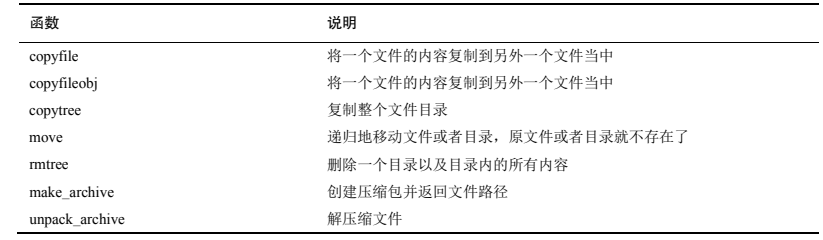


##### 1.1.1.7.2 复制文件和文件夹

- shutil.copy(source, destination)：将路径source处的文件复制到路径 destination处的文件夹（source 和 destination 都是字符串），并返回新复制文件绝对路径字符串。

其中destination可以是：

1）、一个文件的名称，则将source文件复制为新名称的destination

2）、一个文件夹，则将source文件复制到destination中

3）、若这个文件夹不存在，则将source目标文件内的内容复制到destination中,若destination文件夹不存在，则自动生成该文件。(慎用，因为会将source文件复制为一个没有扩展名的名字为destination的文件，这往往不是我们希望的)


In [82]:
"""
这里如果路径下没有bacon.txt，可以从当前代码文件路径下找到bacon.txt，
将其移至指定路径学习使用
"""

import shutil
import os
shutil.copy('D:\\Datawhale\\python办公自动化\\bacon.txt', 'D:\\Datawhale\\practice')

'D:\\Datawhale\\practice\\bacon.txt'

- shutil.copytree(source, destination):将路径source处的文件夹，包括其包含的文件夹和文件，复制到路径destination处的文件夹,并返回新复制文件夹绝对路径字符串。

注：destination处的文件夹为新创建的文件夹，如已存在，则会报错


In [85]:
import shutil
shutil.copytree('D:\\Datawhale\\python办公自动化','D:\\Datawhale\\practice')

FileExistsError: [WinError 183] 当文件已存在时，无法创建该文件。: 'D:\\Datawhale\\practice'

In [86]:
import shutil
shutil.copytree('D:\\Datawhale\\python办公自动化','D:\\Datawhale\\practice_unexist')

'D:\\Datawhale\\practice_unexist'

#### 1.1.7.3 文件和文件夹的移动与改名

- shutil.move(source, destination)：将路径 source 处的文件/文件夹移动到路径destination，并返回新位置的绝对路径的字符串。

1)、如果source和destination是文件夹，且destination已存在，则会将source文件夹下所有内容复制到destination文件夹中。移动。

2）、如果source是文件夹，destination不存在，则会将source文件夹下所有内容复制到destination文件夹中，source原文件夹名称将被替换为destination文件夹名。   移动+重命名

3）、如果source和destination是文件，source处的文件将被移动到destination处的位置，并以destination处的文件名进行命名，移动+重命名。

注意：如果destination中有原来已经存在同名文件，移动后，会被覆写，所以应当特别注意。


In [87]:
import shutil
shutil.move('D:\\Datawhale\\practice','D:\\Datawhale\\docu')

'D:\\Datawhale\\docu'

#### 1.1.7.4 永久删除文件和文件夹

- os.unlink(path): 删除path处的文件。

- os.rmdir(path): 删除path处的文件夹。该文件夹必须为空，其中没有任何文件和文件夹。

- shutil.rmtree(path):删除 path 处的文件夹，它包含的所有文件和文件夹都会被删除。

注意：使用时，需要非常小心，避免删错文件，一般在第一次运行时，注释掉这些程序，并加上*print()*函数来帮助查看是否是想要删除的文件。


In [89]:
#建议先指定操作的文件夹，并查看
os.chdir('D:\\Datawhale\\docu')
os.getcwd()

'D:\\Datawhale\\docu'

In [95]:
import os
for filename in os.listdir():
    print(filename)
    os.unlink(filename)

# 可以看到bacon.txt已经被删除

for filename in os.listdir():
    print(filename)

bacon.txt


#### 1.1.7.5 用send2trash模块安全地删除

*shutil.rmtree(path)*会不可恢复的删除文件和文件夹，用起来会有危险。因此使用第三方的*send2trash*模块，可以将文件或文件夹发送到计算机的垃圾箱或回收站，而不是永久删除。因程序缺陷而用send2trash 删除的某些你不想删除的东西，稍后可以从垃圾箱恢复。

注意：使用时，需要非常小心，避免删错文件，一般在第一次运行时，注释掉这些程序，并加上print()函数来帮助查看是否是想要删除的文件。


In [96]:
!pip install send2trash       #安装send2trash模块

ERROR: Invalid requirement: '#安装send2trash模块'


In [97]:
import send2trash
send2trash.send2trash('bacon.txt')

### 1.1.8 遍历目录树

os.walk(path):传入一个文件夹的路径，在for循环语句中使用os.walk()函数，遍历目录树，和range()函数遍历一个范围的数字类似。不同的是，os.walk()在循环的每次迭代中，返回三个值：

 1）、当前文件夹称的字符串。

 2）、当前文件夹中子文件夹的字符串的列表。

 3）、当前文件夹中文件的字符串的列表。

 注：当前文件夹，是指for循环当前迭代的文件夹。程序的当前工作目录，不会因为os.walk()而改变。

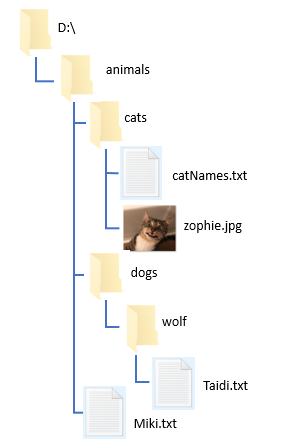

按照下图目录树，创建相应的文件。

In [98]:
import os
for folderName, subFolders,fileNames in os.walk('D:\\animals'):
    print('The current folder is ' + folderName)
    for subFolder in subFolders:
        print('Subfolder of '  + folderName+':'+subFolder)
    for filename in fileNames:
        print('File Inside '  + folderName+':'+filename)
    print('')   

The current folder is D:\animals
Subfolder of D:\animals:cats
Subfolder of D:\animals:dogs
File Inside D:\animals:Miki.txt

The current folder is D:\animals\cats
File Inside D:\animals\cats:catNames.txt
File Inside D:\animals\cats:zophie.jpg

The current folder is D:\animals\dogs
Subfolder of D:\animals\dogs:wolf

The current folder is D:\animals\dogs\wolf
File Inside D:\animals\dogs\wolf:Taidi.txt



### 1.1.9 用zipfile模块压缩文件

为方便传输，常常将文件打包成.zip格式文件。利用zipfile模块中的函数，Python程序可以创建和打开（或解压）zip文件。

#### 1.1.9.1 创建和添加到zip文件

将上述章节中animals文件夹进行压缩。创建一个example.zip的zip文件，并向其中添加文件。

*zipfile.ZipFile('filename.zip', 'w')* ：以写模式创建一个压缩文件

*ZipFile* 对象的 *write('filename','compress_type=zipfile.ZIP_DEFLATED')*方法：如果向write()方法中传入一个路径，Python 就会压缩该路径所指的文件， 将它加到 ZIP 文件中。 如果向write()方法中传入一个字符串，代表要添加的文件名。第二个参数是“压缩类型”参数，告诉计算机用怎样的算法来压缩文件。可以总是将这个值设置为 *zipfile.ZIP_DEFLATED*（这指定了 deflate 压缩算法，它对各种类型的数据都很有效）。

注意：写模式会擦除zip文件中所有原有的内容。如果只希望将文件添加到原有的zip文件中，就要向*zipfile.ZipFile()*传入'a'作为第二个参数，以添加模式打开 ZIP 文件。


In [101]:
## 1 创建一个new.zip压缩文件，并向其中添加文件
import zipfile
newZip = zipfile.ZipFile('new.zip','w')
newZip.write('D:\\animals\\Miki.txt',compress_type=zipfile.ZIP_DEFLATED)
newZip.close()

In [103]:
newZip = zipfile.ZipFile('new.zip','w')
newZip.write('D:\\animals\\dogs\\wolf\\Taidi.txt',compress_type=zipfile.ZIP_DEFLATED)
newZip.close()

In [104]:
## 2 创建一个example.zip的压缩文件，将animals文件夹下所有文件进行压缩。
import zipfile
import os
newZip = zipfile.ZipFile('example.zip','w')
for folderName, subFolders,fileNames in os.walk('D:\\animals'):
    for filename in fileNames:
        newZip.write(os.path.join(folderName,filename),compress_type=zipfile.ZIP_DEFLATED)
newZip.close()

#### 1.1.9.2 读取zip文件

调用*zipfile.ZipFile(filename)*函数创建一个*ZipFile*对象（注意大写字母Z和F）,filename是要读取zip文件的文件名。

*ZipFile*对象中的两个常用方法：

*namelis()*方法，返回zip文件中包含的所有文件和文件夹的字符串列表。

*getinfo()*方法，返回一个关于特定文件的ZipInfo对象。

*ZipInfo*对象的两个属性：*file_size*和*compress_size*，分别表示原来文件大小和压缩后文件大小。1.2.3.2 读取zip文件


In [105]:
import zipfile,os
exampleZip = zipfile.ZipFile('example.zip')
exampleZip.namelist()

['animals/Miki.txt',
 'animals/cats/catNames.txt',
 'animals/cats/zophie.jpg',
 'animals/dogs/wolf/Taidi.txt']

In [106]:
catInfo = exampleZip.getinfo('animals/Miki.txt')

In [107]:
catInfo.file_size

4

In [108]:
catInfo.compress_size

6

In [109]:
print('Compressed file is %s x smaller!' %(round(catInfo.file_size/catInfo.compress_size,2)))

Compressed file is 0.67 x smaller!


In [110]:
exampleZip.close()

#### 1.1.9.3 从zip文件中解压缩

*ZipFile* 对象的 *extractall()*方法：从zip文件中解压缩所有文件和文件夹，放到当前工作目录中。也可以向*extractall()*传递的一个文件夹名称，它将文件解压缩到那个文件夹， 而不是当前工作目录。如果传递的文件夹名称不存在，就会被创建。

*ZipFile* 对象的 *extract()*方法:从zip文件中解压单个文件。也可以向 *extract()*传递第二个参数， 将文件解压缩到指定的文件夹， 而不是当前工作目录。如果第二个参数指定的文件夹不存在， Python 就会创建它。*extract()*的返回值是被压缩后文件的绝对路径。


In [111]:
import zipfile, os
exampleZip = zipfile.ZipFile('example.zip')
exampleZip.extractall('.\zip')
exampleZip.close()

In [112]:
exampleZip = zipfile.ZipFile('example.zip')
exampleZip.extract('animals/Miki.txt')
exampleZip.extract('animals/Miki.txt', 'D:\\animals\\folders')
exampleZip.close()

### 1.1.10 文件查找

对于文件操作，最需要熟练掌握的就是查找文件。前面介绍了使用os.listdir、os.walk方法可以批量列出当前工作目录的全部文件，下面介绍常用于查找特定文件的模块。

#### 1.1.10.1 glob

glob是Python自带的一个文件操作相关模块，用它可以查找符合条件的文件。例如，我们要找到当前目录下全部的.txt文档，可以用下面的代码。

In [12]:
import glob
glob.glob('*.txt')

['bacon.txt', 'test.txt']

这里主要是写匹配条件，“*”匹配任意个字符，“?”匹配单个字符，也可以用“[]”匹配指定范围内的字符，如[0-9]匹配数字。


- glob.glob('*[0-9]*.*')可以匹配当前目录下文件名中带有数字的文件。

- glob.glob(r'G:\*')可以获取G盘下的所有文件和文件夹，但是它不会进一步列明文件夹下的文件。也就是说，其返回的文件名只包括当前目录里的文件名，不包括子文件夹里的文件

#### 1.1.10.2 fnmatch模块

fnmatch也是Python自带的库，是专门用来进行文件名匹配的模块，使用它可以完成更为复杂的文件名匹配。它有4个函数，分别是fnmatch、fnmatchcase、filter和translate，其中最常用的是fnmatch函数，其语法如下。

- fnmatch.fnmatch(filename,pattern)

pattern表示匹配条件，测试文件名filename是否符合匹配条件。

下面找出目标文件夹里所有结尾带数字的文件

In [9]:
import os,fnmatch
path = os.getcwd() # 获取当前代码文件所在目录
for foldname, subfolders,filenames in os.walk(path):
    for filename in filenames:
        if fnmatch.fnmatch(filename,'*[0-9].*'):
            print(filename)

1.png
2.png
myCats.cpython-38.pyc


fnmatchcase和fnmatch函数类似，只是fnmatchcase函数强制区分字母大小写。

以上两个函数都返回True或者False，filter函数则返回匹配的文件名列表，其语法如下:

- fnmatch.filter(filelist,pattern)

#### 1.1.10.3 hashlib模块

随着计算机中文件越来越多，我们需要找出重复文件。重复文件可能有不同的文件名，不能简单用文件名和文件大小来判断。从科学角度，最简单的办法就是通过MD5来确定两个文件是不是一样的。

Python自带的hashlib库里提供了获取文件MD5值的方法。

In [10]:
import hashlib
m = hashlib.md5()
f = open('bacon.txt','rb')
m.update(f.read())
f.close()
md5_value = m.hexdigest()
print(md5_value)

eced185a808aa692d6d6712d0410581d


电子文件容易被篡改或者伪造，在出现纠纷时，怎么提供有力的证据来证明文件的真实性？一个可行的办法就是制作文件后对整个文件生成MD5值。一旦MD5值生成之后，文件发生过任何修改，MD5值都将改变，通过此方法可以确定文件是否被篡改过。

### 1.1.11 练习

1）、编写一个程序，遍历一个目录树，查找特定扩展名的文件（诸如.pdf 或.jpg）。不论这些文件的位置在哪里， 将它们拷贝到一个新的文件夹中。

2） 、一些不需要的、 巨大的文件或文件夹占据了硬盘的空间， 这并不少见。如果你试图释放计算机上的空间， 那么删除不想要的巨大文件效果最好。但首先你必须找到它们。编写一个程序， 遍历一个目录树， 查找特别大的文件或文件夹， 比方说， 超过100MB 的文件（回忆一下，要获得文件的大小，可以使用 os 模块的 os.path.getsize()）。将这些文件的绝对路径打印到屏幕上。

3）、编写一个程序， 在一个文件夹中， 找到所有带指定前缀的文件， 诸如 spam001.txt,spam002.txt 等，并定位缺失的编号（例如存在 spam001.txt 和 spam003.txt， 但不存在 spam002.txt）。让该程序对所有后面的文件改名， 消除缺失的编号。作为附加的挑战，编写另一个程序，在一些连续编号的文件中，空出一些编号，以便加入新的文件。


# 1.3 自动发送电子邮件

使用Python实现自动化邮件发送，可以让你摆脱繁琐的重复性业务，节省非常多的时间。

Python有两个内置库：smtplib和email，能够实现邮件功能，smtplib库负责发送邮件，email库负责构造邮件格式和内容。

邮件发送需要遵守SMTP协议，Python内置对SMTP的支持，可以发送纯文本邮件、HTML邮件以及带附件的邮件。


In [113]:
#1 先导入相关的库和方法
import smtplib  #导入库
from smtplib import SMTP_SSL  #加密邮件内容，防止中途被截获
from email.mime.text import  MIMEText   #构造邮件的正文
from email.mime.image import MIMEImage  #构造邮件的图片
from email.mime.multipart import MIMEMultipart   #把邮件的各个部分装在一起，邮件的主体
from email.header import Header   #邮件的文件头，标题，收件人

In [121]:
#2 设置邮箱域名、发件人邮箱、邮箱授权码、收件人邮箱
host_server = 'smtp.163.com' #sina 邮箱smtp服务器                 #smtp 服务器的地址
sender_163 = 'pythonauto_emai@163.com'                   #sender_163为发件人的邮箱
pwd = 'DYEPOGLZDZYLOMRI'                    #pwd为邮箱的授权码'DYEPOGLZDZYLOMRI'
#也可以自己注册个邮箱，邮箱授权码'DYEPOGLZDZYLOMRI' 获取方式可参考#http://help.163.com/14/0923/22/A6S1FMJD00754KNP.html

# 设置接受邮箱，换成自己的邮箱即可
receiver = '1121091694@qq.com'      

In [115]:
#3 构建MIMEMultipart对象代表邮件本身，可以往里面添加文本、图片、附件等
msg = MIMEMultipart()    #邮件主体

In [116]:
#4 设置邮件头部内容
mail_title = 'python办公自动化邮件'   # 邮件标题
msg["Subject"] = Header(mail_title,'utf-8')  #装入主体
msg["From"] = sender_163           #寄件人
msg["To"] = Header("测试邮箱",'utf-8') #标题

In [117]:
#5 添加正文文本
mail_content = "您好，这是使用python登录163邮箱发送邮件的测试"   #邮件的正文内容
message_text = MIMEText(mail_content,'plain','utf-8')   #构造文本,参数1：正文内容，参数2：文本格式，参数3：编码方式
msg.attach(message_text)    # 向MIMEMultipart对象中添加文本对象

In [118]:
#6 添加图片
image_data = open('D:\\animals\\cats\\zophie.jpg','rb')   # 二进制读取图片
message_image = MIMEImage(image_data.read())  # 设置读取获取的二进制数据
image_data.close()       # 关闭刚才打开的文件
msg.attach(message_image)  # 添加图片文件到邮件信息当中去

In [119]:
# 7 添加附件(excel表格)
atta = MIMEText(open('D:\\animals\\cats\\cat.xlsx', 'rb').read(), 'base64', 'utf-8')   # 构造附件
atta["Content-Disposition"] = 'attachment; filename="cat.xlsx"'  # 设置附件信息
msg.attach(atta)       ## 添加附件到邮件信息当中去

In [122]:
#8 发送邮件
smtp = SMTP_SSL(host_server)       #SSL登录  创建SMTP对象
smtp.login(sender_163,pwd)         ## 登录邮箱，传递参数1：邮箱地址，参数2：邮箱授权码
smtp.sendmail(sender_163,receiver,msg.as_string()) # 发送邮件，传递参数1：发件人邮箱地址，参数2：收件人邮箱地址，参数3：把邮件内容格式改为str
print("邮件发送成功")
smtp.quit         # 关闭SMTP对象

邮件发送成功


<bound method SMTP.quit of <smtplib.SMTP_SSL object at 0x000001975471B880>>

参考！！！：

https://github.com/datawhalechina/team-learning-program/blob/master/OfficeAutomation/Task01%20%E6%96%87%E4%BB%B6%E8%87%AA%E5%8A%A8%E5%8C%96%E4%B8%8E%E9%82%AE%E4%BB%B6%E5%A4%84%E7%90%86.md

和

《学Python，不加班——轻松实现办公自动化》-何华平 一书的第三章高效办公文件管理
